# Module 2 Numerical Integration (2 of n)


## Learning objectives

- improve the efficiency of our integration algorithms by using the trapezoid and Simpson's method
- utilize a published library to compute integrals

# Pre-class

* be ready to share your work on M2 ~~with your group~~, and discuss
* watch [Video 3.2](https://youtu.be/TzXShbDDE_o) (on log plots and exponents, will help with HW)
* read the text of this module, and be ready to ask questions and discuss the mathematics


## Group discussion: Numerical errors in integration methods

Examine your work on previous HW problems: you should be able to observe that the errors in the left and right endpoint rules for numerical integration are proportional to $1/N$, where $N$ is the
number of subintervals. The width of each subinterval is $h = (b-a)/N$, so we say the error in these methods "scales like" (is proportional to) $h$.

*If you don't observe this in your log-log plots .... ask an instructor ...*

Thus, if you want to reduce the error in a calculation by a factor of $10^6$, you must increase the number of subintervals
by a factor of $10^6$. This requires $10^6$ times as many evaluations of the integrand $f(x)$. This might be fine for simple problems,
with simple integrands.
But for complicated integrands that require a lot of computer time to evaluate, this can be a problem. In those cases
we need a more efficient integration scheme.

The midpoint rule is better than the left or right endpoint rules; the errors in this method are proportional to $1/N^2$,
or $h^2$. With the midpoint rule we can reduce the error by a factor of $10^6$ by increasing the number of subintervals
by a factor of $1000$. This requires "only" $1000$ times as many evaluations of $f(x)$.

Today, we'll find out: *can we do even better?* and what are the pros/cons of the different methods?



## Trapezoid rule

The errors for the left endpoint rule and the right endpoint rule are similar. To be precise,
the order $h^2$ terms are the same apart from the overall sign, and the point of evaluation of $f''(x)$. The point of evaluation should
not make much difference, assuming $h$ is small. This suggests that the errors in the left and right endpoint rules should be
approximately equal in magnitude but opposite in sign.  You might have noticed this from working with the
left and right endpoint rules in the previous lesson.

This observation leads us to the trapezoid rule for numerical integration. The trapezoid rule is obtained by
taking the _average_ of the left and right endpoint rules. That is, we approximate the integral

$$
	I = \int_a^b f(x)\,dx
$$

by

$$
	I_T = \frac{1}{2} \left( I_L + I_R\right) = \sum_{i=0}^{N-1} \frac{1}{2} \left[ f(a + ih) + f(a + ih + h) \right] h
$$

![Integration trapezoids](https://upload.wikimedia.org/wikipedia/commons/a/a8/Calkowanie_numeryczne-metoda_trapezow.png)

Geometrically, the area for each subinterval is approximated as the area of a trapezoid that touches the curve $f(x)$ at both
endpoints. Note that the trapezoid rule can be rearranged in this way:

$$
	I_T = \frac{h}{2}\left[ f(a) + f(b)\right] + \sum_{i=1}^{N-1} f(a+ih) h
$$

This result is important because it shows that the trapezoid rule requires only $N+1$ evaluations of the function $f(x)$. This is essentially the same as the number of evaluations required for the left endpoint, right endpoint, and midpoint rules,
namely $N$.

**Note:** In the second version, can you see how the $i=0$ and $i=N-1$ contributions to the sum are moved out of the sum?




## Homework 3.3 ($\LaTeX{}$)

Consider the integral

$$
	I = \int_{-1}^1 \cos(x^2 - x) \, dx
$$

For the left endpoint rule, midpoint rule, and trapezoid rule, find (approximately) the number
of subintervals required to achieve an error of about $\pm 10^{-4}$. In each case, how many function evaluations
are required?

In [1]:
import numpy as np
from prettytable import PrettyTable

#leftpoint rule

def leftpoint(f, a, b, N):
  delta_x = (b-a)/(N-1)
  mysum = 0
  for i in range(N):
    mysum = mysum + (f((a+(i*delta_x))*(a+(i*delta_x)) - (a+(i*delta_x))) * delta_x)
  return mysum

#midpoint rule

def midpoint(f, a, b, N):
  delta_x = (b-a)/(N-1)
  mysum = 0
  for i in range(N):
    mysum = mysum + (f((a + (delta_x/2) + i*delta_x)*(a + (delta_x/2) + i*delta_x) - (a + (delta_x/2) + i*delta_x)) * delta_x)
  return mysum

#trapezoid rule

def trapezoid(f, a, b, N):
  delta_x = (b-a)/(N-1)
  mysum = 0
  for i in range(N):
    mysum = mysum + ((f((a+(i*delta_x))*(a+(i*delta_x)) - (a+(i*delta_x))) + f((a+((i+1)*delta_x))*(a+((i+1)*delta_x)) - (a+((i+1)*delta_x))))* (delta_x / 2))
  return mysum

#find the number of subintervals required to achieve an error of +-10^-4

Nlist = [] #start with an empty list
anslist_left = []
anslist_mid = []
anslist_trap = []
#source: https://www.geeksforgeeks.org/python/python-list-append-method/
table = PrettyTable(["N", "I_left", "I_mid", "I_trap"])

for i in range(1, 300): #filling list with variables to start with a full set of Ns and empty anslist
  Nlist.append(100*i)
  anslist_left.append(0)
  anslist_mid.append(0)
  anslist_trap.append(0)

for iN, N in enumerate(Nlist): #now we are filling the list with the function evaluations
    anslist_left[iN] = leftpoint(np.cos,-1,1,N)
    anslist_mid[iN] = midpoint(np.cos,-1,1,N)
    anslist_trap[iN] = trapezoid(np.cos,-1,1,N)
    table.add_row([N, anslist_left[iN], anslist_mid[iN], anslist_trap[iN]])

print(table)

+-------+--------------------+--------------------+--------------------+
|   N   |       I_left       |       I_mid        |       I_trap       |
+-------+--------------------+--------------------+--------------------+
|  100  | 1.5612748897893594 | 1.575717527037371  | 1.5755772580226148 |
|  200  | 1.5583811387469257 | 1.565531769242831  | 1.5654971955959798 |
|  300  | 1.5574126801922104 | 1.5621641762103546 | 1.562148881413743  |
|  400  | 1.5569277445798733 | 1.5604855364398196 | 1.5604769529697988 |
|  500  | 1.5566365597257925 | 1.5594799989484764 | 1.5594745131124585 |
|  600  | 1.5564423439540458 | 1.558810325730097  | 1.558806519622071  |
|  700  | 1.5563035732622306 | 1.5583323230036277 | 1.558329528512264  |
|  800  | 1.5561994706269953 | 1.557974004212533  | 1.5579718657308974 |
|  900  | 1.5561184873538296 | 1.5576954203676672 | 1.557693731348153  |
|  1000 | 1.5560536915793286 | 1.557472621654481  | 1.5574712539662268 |
|  1100 | 1.556000670809003  | 1.5572903769847946 |

The leftpoint reached accuracy of four decimal places after approximately 202 iterations of (ix100), which is iteration 20200. The midpoint reached accuracy of four decimal places after 2 iterations of (ix100), which is iteration 200. The trapezoid function reached accuracy of four decimal places after 286 iterations of (ix100), which is iteration 28600.

## Simpson's Rule

We have now identified two integration methods with errors (per subinterval) of order $h^3$. The midpoint rule has error
${\cal E}_M$ in each subinterval. The trapezoid rule has error ${\cal E}_T$
in each subinterval.
Some math would show that to leading order, ${\cal E}_T = -2{\cal E}_M$. This suggests
that we can define a new integration method as a weighted sum of the midpoint and trapezoid rules, designed
to cancel the order $h^3$ terms in the error. This leads to *Simpson's rule*:

$$
	I_S = \frac{1}{3} I_T + \frac{2}{3} I_M
$$

which can be written explicitly as

$$
	I_S = \frac{h}{6}\left\{ f(a) + f(b) + 2\sum_{i=1}^{N-1} f(a + ih) + 4\sum_{i=1}^N f(a+ih - h/2) \right\}
$$

Note that for implementation purposes, you could simply call the trapezoid and midpoint functions you've already written.

For Simpson's rule, the errors of order $h^3$ from the midpoint and trapezoid rules cancel. A complete analysis
shows that the order $h^4$ terms in the error actually vanish as well. The leading non--zero term in the error is proportional
to $h^5$. That is, for Simpson's rule, the error in each
subinterval is order $h^5$. The total error for $N\sim 1/h$ subintervals
is proportional to $Nh^5 \sim h^4$.

Geometrically, Simpson's rule is obtained by approximating the area in each subinterval as the area under
a parabola that matches the function $f(x)$ at each endpoint and at the midpoint.
Simpson's rule is more efficient than any of the other integration methods we have discussed. If we want to reduce
the error by a factor of $10^6$, we must increase the number of subintervals by a factor of
$10^{6/4}\approx 32$. Note that Simpson's rule requires $2N + 1$ function evaluations. This is roughly twice as
many evaluations as our other methods. However, the rapid reduction of error with a relatively small increase in $N$
will usually offset the extra function calls.  

# Homework

The error function is defined by

$$
	{\rm erf}(x) \equiv \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt
$$

### a) Write a function `SimpErf` to evaluate the error function using Simpson's rule

- Input: x
- Output: the right hand side of the equation above

Hint: for each value $0 \le x \le 3$,  you will need to evaluate the integral over $t$.

30.445253286302584


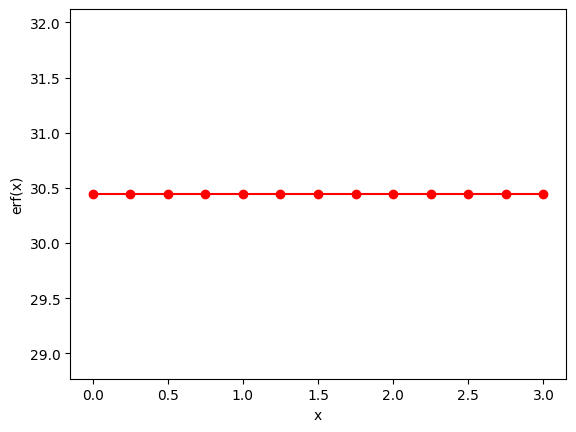

In [2]:

import numpy as np
import pylab as py

#midpoint rule (fixed to make a bit more generic)

def midpoint(f, a, b, N):
  delta_x = (b-a)/N
  mysum = 0
  for i in range(N):
    mysum += (f(a + (delta_x/2) + i*delta_x) * delta_x)
  return mysum

#trapezoid rule (fixed to make more generic)

def trapezoid(f, a, b, N):
  delta_x = (b-a)/N
  mysum = 0
  for i in range(N):
    mysum = mysum + (f(a+(i*delta_x)) + f(a+((i+1)*delta_x)) * (delta_x / 2))
  return mysum

#define function SimpErf

def SimpErf(f, a, b, N):
  dx = (b-a)/N
  mysum = 0
  mysum += ((1/3)*trapezoid(f, a, b, N) + (2/3)*midpoint(f, a, b, N))
  return mysum

#evaluate the error function

x = 100
N = 10000
evaluation = SimpErf(lambda t: np.exp(-(t*t)), 0, x, N)
print(evaluation)

#plot erf(x) vs x for 0 <= x <= 3

Xlist = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3]
anslist = [0,0,0,0,0,0,0,0,0,0,0,0,0]

for iX, X in enumerate(Xlist):
  anslist[iX] = SimpErf(lambda t: np.exp(-(t*t)), 0, x, N)

py.plot(Xlist, anslist,'o-', color = 'red')
py.xlabel('x')
py.ylabel('erf(x)')
py.show()



### b) Make a labelled plot of ${\rm erf}(x)$ versus $x$ for $0 \le x \le 3$.

### c) Using `scipy.integrate`

Fortunately, people have been working on numerical integration for a long time and have several more advanced methods.  Often, it's not worth reinventing the wheel, and it's better to simply call an already written _library_ function.  In scipy, we can use the `quad` function for this -- it's found in the `scipy.integrate` module.

- https://docs.scipy.org/doc/scipy/reference/integrate.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad

In the simplest form, it takes a function and the limits as arguments:

    from scipy.integrate import quad

    answer = quad(f, a, b)
    
`a` and `b` are numbers, and `f` is a function (either one that you define, or one that is already defined. It returns the answer, and an estimate of what the error in the answer is.

Define two functions: function `Sq` that returns the square of input $x$ and function `SqInt` that computes the integral of $x^2$ from $a$ to $b$ using the `Sq` and the `quad` function. This problem will be autograded by nbgrader.

**Bonus Challenge:** can you make it so that each function has only a `def` line and a `return` line?

In [7]:
from scipy.integrate import quad

f = x
a = 2
b = 3
ans = 0

#define Sq (returns square of the function)
def Sq(f):
  return (f*f)

#define SqInt (returns square root)
def SqInt(f, a, b):
  ans = quad(Sq(f), a, b)
  return quad(Sq(f), a, b)

print(ans)





0
